In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("random_subset.csv")
df.head()


,site,year,date,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,...,Nearby_Peak2Lag3_MeanTemperature,Nearby_Peak2Lag3_MinTemperature,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean
12968698,2089,2006,2006-01-26,NaN,0.000000,73.987297,72.0,77.657501,69.0,73.954903,...,287.849070,278.150013,0.530,0.9950,0.546850,1.941235e+15,0.001023,NaN,302.150009,2.652945
3684565,594,2005,2005-07-27,12.4500,1.421119,57.862801,11.0,64.822502,7.0,57.674400,...,297.429655,288.691360,-0.500,-8.3950,0.375200,3.425424e+15,0.001029,0.070402,306.274994,5.757557
8902726,1434,2010,2010-05-23,7.2021,0.168180,15.590796,22.0,21.070801,18.0,14.590855,...,292.463305,285.329204,-0.535,-3.6725,0.336400,NaN,0.000907,NaN,341.875000,4.832584
4678115,754,2005,2005-06-07,NaN,0.000000,48.395401,46.0,55.554600,42.0,48.348202,...,293.770880,289.570761,-0.960,-12.5750,0.408467,3.251750e+15,0.000913,-0.090091,310.350006,8.212214
9079551,1463,2001,2001-06-14,NaN,0.000000,1257.494019,1220.0,1269.731812,1210.0,1257.504150,...,286.778733,283.691362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.apply(lambda x: x.count(), axis=0)


site                                              66943
year                                              66943
date                                              66943
MonitorData                                       14639
GFEDFireCarbon                                    66943
USElevation_dsc10000                              66877
USElevation_max100                                66877
USElevation_max10000                              66877
USElevation_mea100                                66815
USElevation_mea10000                              66877
USElevation_med100                                66851
USElevation_med10000                              66877
USElevation_min100                                66780
USElevation_min10000                              66877
USElevation_std100                                66877
USElevation_std10000                              66877
USElevation_bln100                                66809
USElevation_bln10000                            

In [4]:
print(df.shape)

(66943, 116)


In [5]:
print(max(df.site.unique()))
# number of sites - the set df.site.unique() has all integers from 1 to 2156, most likely 
# meaning that there are 2156 sites total

2156


In [6]:
for n in df.columns:
    print(n)

site
year
date
MonitorData
GFEDFireCarbon
USElevation_dsc10000
USElevation_max100
USElevation_max10000
USElevation_mea100
USElevation_mea10000
USElevation_med100
USElevation_med10000
USElevation_min100
USElevation_min10000
USElevation_std100
USElevation_std10000
USElevation_bln100
USElevation_bln10000
NLCD_Barren100
NLCD_Barren10000
NLCD_Developed100
NLCD_Developed10000
NLCD_Herbaceous100
NLCD_Herbaceous10000
NLCD_Planted100
NLCD_Planted10000
NLCD_Shrubland100
NLCD_Shrubland10000
NLCD_Water100
NLCD_Water10000
NLCD_Wetlands100
NLCD_Wetlands10000
NLCD_Impervious100
NLCD_Impervious10000
RoadDensity_primaryroads1000
RoadDensity_primaryroads10000
RoadDensity_prisecroads1000
RoadDensity_prisecroads10000
RoadDensity_roads1000
Business_Restaurant1000
PM25_Region
Ozone_Region
NO2_Region
MAIACUS_Optical_Depth_047_Aqua_Nearest4
MAIACUS_Optical_Depth_055_Aqua_Nearest4
MAIACUS_Optical_Depth_047_Terra_Nearest4
MAIACUS_Optical_Depth_055_Terra_Nearest4
MAIACUS_cosVZA_Aqua_Nearest
MAIACUS_cosVZA_Terra_

In [7]:
df.describe()

,site,year,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,USElevation_med100,...,Nearby_Peak2Lag3_MeanTemperature,Nearby_Peak2Lag3_MinTemperature,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean
count,66943.000000,66943.000000,14639.000000,66943.000000,66877.000000,66877.000000,66877.000000,66815.000000,66877.000000,66851.000000,...,62900.000000,62900.000000,36390.000000,36335.000000,36948.000000,2.558100e+04,45956.000000,22365.000000,37320.000000,38933.000000
mean,1077.619856,2008.036778,10.042594,0.216929,441.721095,436.330353,450.696013,430.123700,441.631130,429.912372,...,285.927650,281.111734,0.199766,-9.798504,0.431423,2.578543e+15,0.001067,0.035384,307.874759,5.157990
std,623.005980,4.910376,7.389720,4.788176,576.411308,571.192322,580.292913,569.629374,576.450207,569.626976,...,9.998681,9.477339,0.826597,6.142201,0.916209,5.871053e+14,0.000115,0.423264,37.078323,3.093135
min,1.000000,2000.000000,0.002080,0.000000,-35.159500,-30.000000,-33.675400,-31.000000,-36.099899,-31.000000,...,255.441667,255.927778,-3.060000,-33.299999,0.000000,5.927176e+14,0.000663,-1.886842,215.100002,0.032164
25%,536.000000,2004.000000,5.100000,0.000000,73.947601,74.000000,80.281601,69.000000,73.853401,69.000000,...,278.704162,274.216572,-0.325000,-14.220000,0.208469,2.119483e+15,0.000981,-0.135166,283.324997,2.353704
50%,1077.000000,2008.000000,8.300000,0.000000,226.730896,222.000000,235.199799,214.000000,226.673401,214.000000,...,286.779379,281.483333,0.185000,-9.740000,0.329200,2.665136e+15,0.001058,0.019442,302.200005,4.985079
75%,1618.000000,2012.000000,12.913540,0.045563,432.941193,421.000000,446.107300,419.000000,432.867004,420.000000,...,294.027378,288.674663,0.690000,-5.225000,0.492175,3.053803e+15,0.001143,0.184117,327.056255,7.722930
max,2156.000000,2016.000000,114.318750,872.076536,3325.267822,3417.000000,3379.857422,3387.000000,3325.095215,3389.000000,...,327.534693,316.681673,9.300000,10.836666,29.252800,4.240576e+15,0.001645,29.257502,617.799988,14.027688


In [8]:
df_no_missing = df.dropna()
df_no_missing.shape 
# all rows have some missing data...

(0, 116)

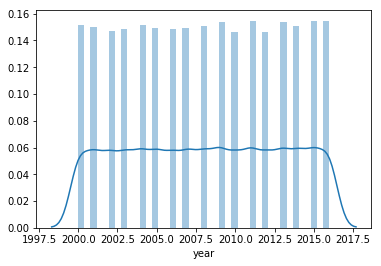

In [9]:
ax = sns.distplot(df.year)
plt.show()   

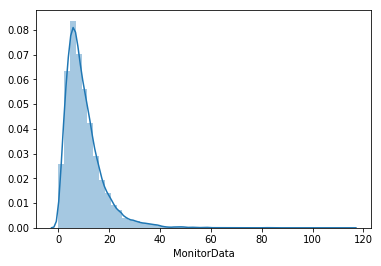

In [10]:
ax = sns.distplot(df.MonitorData.dropna())
plt.show()  

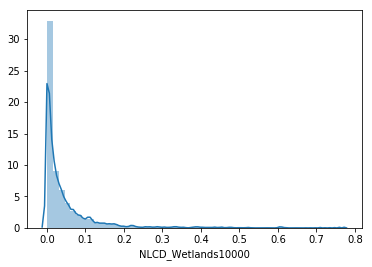

'\nwetland coverage from NLCD data set, the original 30 meter data were aggregated to \n10000 meter raster, then the code interpolate the 10000-meter raster to locations of interests\n'

In [11]:
ax = sns.distplot(df.NLCD_Wetlands10000.dropna())
plt.show()  
'''
wetland coverage from NLCD data set, the original 30 meter data were aggregated to 
10000 meter raster, then the code interpolate the 10000-meter raster to locations of interests
'''

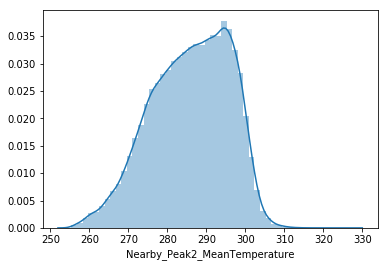

In [12]:
ax = sns.distplot(df.Nearby_Peak2_MeanTemperature.dropna())
plt.show()  

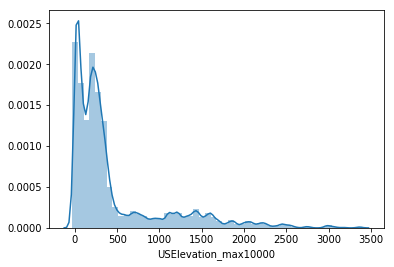

In [13]:
ax = sns.distplot(df.USElevation_max10000.dropna())
plt.show()  

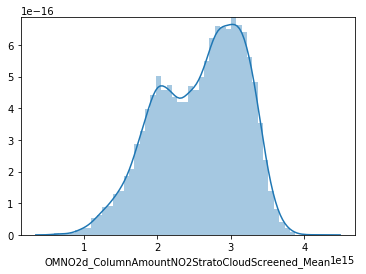

'\nSatellite-measured column NO2 concentration (some kind of averaging...?)\n'

In [14]:
ax = sns.distplot(df.OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean.dropna())
plt.show()  
'''
Satellite-measured column NO2 concentration (some kind of averaging...?)
'''

In [15]:
sites = pd.read_csv("gps_coord.csv")
sites
# from Qian's email, the coords in the cluster are in conic? (not GPS)

,SITEID,Lat,Lon
0,'010030010',30.49748,-87.88026
1,'010270001',33.28493,-85.80361
2,'010331002',34.76262,-87.63810
3,'010491003',34.28857,-85.96986
4,'010550010',33.99149,-85.99265
5,'010690003',31.22478,-85.39079
6,'010730023',33.55306,-86.81500
7,'010731005',33.33111,-87.00361
8,'010731010',33.54528,-86.54917
9,'010732003',33.49972,-86.92417


/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


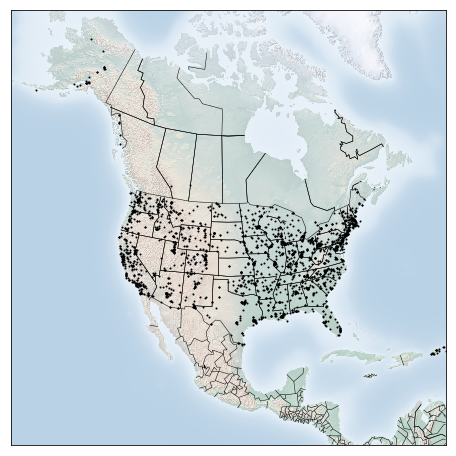

In [18]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.drawstates()
m.drawcountries()

# Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)

for n in range(len(sites)):
    x, y = m(sites.Lon[n],  sites.Lat[n])
    
    plt.plot(x, y, 'ok', markersize=1)
    # plt.text(x, y, ' Seattle', fontsize=12);
m.shadedrelief(scale=0.5, alpha=0.5)
plt.show()